# Monitor Convergence folder by folder
To use this program : 
* Execute the first and second cells. In the input of the second cell give the integer that represents the folder you want to monitor in the first output.

* Execute the third cell in order to see the results as a function on iteration.

If you execute the third cell for the first time after starting the kernel, you may have to execute it a second time before seeing the graphs.

In [1]:
import sys
import os
from fabric import Connection
from scripts import distant_consts as CONSTS
all_datafolder = CONSTS.distant_data_dir
with Connection(CONSTS.ssh_address) as c:
    result = c.run("cd " + all_datafolder + ";ls",hide=True)
    folders = result.stdout.split()
    for i,f in enumerate(folders):
        print('%d : %s' % (i, f))

0 : ep9.01132111_beta60_mu11.82_U11.98797552_tpd1.55780067_tppp0.98642424
1 : ep9.01132111_beta60_mu11.84_U11.98797552_tpd1.55780067_tppp0.98642424
2 : ep9.01132111_beta60_mu11.86_U11.98797552_tpd1.55780067_tppp0.98642424
3 : ep9.01132111_beta60_mu11.88_U11.98797552_tpd1.55780067_tppp0.98642424
4 : ep9.01132111_beta60_mu11.9_U11.98797552_tpd1.55780067_tppp0.98642424
5 : ep9_beta58_mu11.18_U12_tpd1.3_tppp1
6 : ep9_beta60_mu11.36_U12_tpd1.5_tppp1.8
7 : ep9_beta60_mu11.37_U12_tpd1.5_tppp1.8
8 : ep9_beta60_mu11.38_U12_tpd1.5_tppp1.8
9 : ep9_beta60_mu11.39_U12_tpd1.5_tppp1.8
10 : ep9_beta60_mu11.41_U12_tpd1.5_tppp1.8
11 : ep9_beta60_mu11.4_U12_tpd1.5_tppp1.8
12 : ep9_beta64_mu11.59_U12_tpd1.5_tppp1
13 : ep9_beta68_mu11.62_U12_tpd1.5_tppp1
14 : ep9_beta68_mu11.66_U12_tpd1.5_tppp1


In [2]:
import numpy as np
from scripts import distant_utils as UTILS
folder = folders[int(input())]
folder_data = UTILS.get_folder_data(folder,c)
graph = folder_data["graph"]
pn_graph = folder_data["pn_graph"]
N_graph = folder_data["N_graph"]
sign_graph = folder_data["sign_graph"]

4


<IPython.core.display.Javascript object>


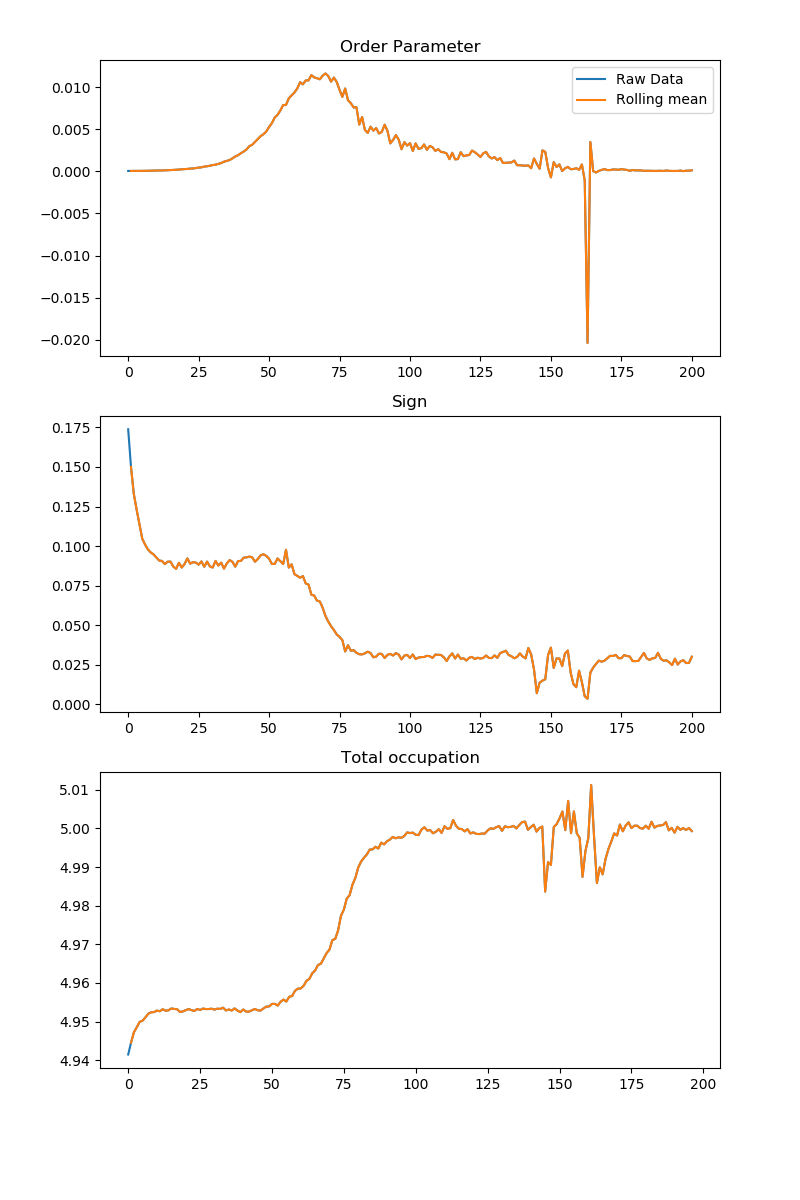

L'occupation n'a pas été calculé en entier : 201 197


In [4]:
from matplotlib.pyplot import figure
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas
mean_over = 1
def print_and_mean(data,ax):
    n = len(data)
    X = np.linspace(mean_over,n-1,n-mean_over)
    panda_data = pandas.DataFrame(data=data)
    ax.plot(data,label="Raw Data")
    ax.plot(X,panda_data.rolling(mean_over).mean().values.flatten()[mean_over:],label="Rolling mean")
    
fig,ax = plt.subplots(3, figsize=(8, 12))
print_and_mean(graph,ax[0])
ax[0].set_title("Order Parameter")
print_and_mean(sign_graph,ax[1])
ax[1].set_title("Sign")
ax[2].set_title("Total occupation")
try:
    print_and_mean(2*N_graph + 4*pn_graph,ax[2])
except:
    print_and_mean(2*N_graph[len(pn_graph)] + 4*pn_graph,ax[2])
    if len(N_graph) != len(pn_graph):
        print("The oxygen occupation was not fully computed :", len(N_graph), len(pn_graph))
ax[0].legend()
plt.subplots_adjust(top=0.95)
plt.show()